In [1]:
import pandas as pd
import numpy as np

In [2]:
nikel = pd.read_csv('data/price/Nickel Futures Historical Data.csv')
oil = pd.read_csv('data/price/Brent Oil Futures Historical Data.csv')
usd_rub = pd.read_csv('data/price/USD_RUB Historical Data (1).csv')

In [3]:
nikel.columns = ["Date","Price", "Open","High", "Low", "Vol", "Change" ]
oil.columns = ["Date","Price", "Open","High", "Low", "Vol", "Change" ]
usd_rub.columns = ["Date","Price", "Open","High", "Low", "Vol", "Change" ]

In [4]:
def drop_col(table):
    table = table.drop(["Open", "High", "Low", "Change"], axis=1)
    return table

In [5]:
nikel = drop_col(nikel)
oil = drop_col(oil)
usd_rub = drop_col(usd_rub)

In [6]:
usd_rub 

,Date,Price,Vol
0,11/14/2024,100.2505,NaN
1,11/13/2024,98.4955,NaN
2,11/12/2024,98.2455,NaN
3,11/11/2024,95.9955,NaN
4,11/08/2024,97.5955,NaN
...,...,...,...
3020,01/18/2013,30.2670,NaN
3021,01/17/2013,30.1730,NaN
3022,01/16/2013,30.3410,NaN
3023,01/15/2013,30.2980,NaN


In [7]:
nikel['Date'] = pd.to_datetime(nikel['Date'])
oil['Date'] = pd.to_datetime(oil['Date'])
usd_rub['Date'] = pd.to_datetime(usd_rub['Date'])

In [8]:
merged_df = pd.merge(nikel, oil, on='Date', how='left')
merged_df = pd.merge(merged_df, usd_rub, on='Date', how='left')

In [9]:
merged_df

,Date,Price_x,Vol_x,Price_y,Vol_y,Price,Vol
0,2024-11-14,"15,677.00",,72.61,,100.2505,NaN
1,2024-11-13,"15,765.00",,72.28,388.33K,98.4955,NaN
2,2024-11-12,"15,989.00",,71.89,317.34K,98.2455,NaN
3,2024-11-11,"16,083.00",,71.83,366.90K,95.9955,NaN
4,2024-11-08,"16,327.00",,73.87,324.16K,97.5955,NaN
...,...,...,...,...,...,...,...
2986,2013-01-18,"17,560.00",,111.89,182.51K,30.2670,NaN
2987,2013-01-17,"17,586.00",,111.10,206.29K,30.1730,NaN
2988,2013-01-16,"17,405.00",,110.61,19.71K,30.3410,NaN
2989,2013-01-15,"17,510.00",,110.30,101.26K,30.2980,NaN


In [10]:
merged_df = merged_df.drop(["Vol_x", "Vol_y", "Vol"], axis=1)

In [11]:
merged_df

,Date,Price_x,Price_y,Price
0,2024-11-14,"15,677.00",72.61,100.2505
1,2024-11-13,"15,765.00",72.28,98.4955
2,2024-11-12,"15,989.00",71.89,98.2455
3,2024-11-11,"16,083.00",71.83,95.9955
4,2024-11-08,"16,327.00",73.87,97.5955
...,...,...,...,...
2986,2013-01-18,"17,560.00",111.89,30.2670
2987,2013-01-17,"17,586.00",111.10,30.1730
2988,2013-01-16,"17,405.00",110.61,30.3410
2989,2013-01-15,"17,510.00",110.30,30.2980


In [12]:
merged_df[["Price_x", "Price_y", "Price"]] = merged_df[["Price_x", "Price_y", "Price"]].replace({',': ''}, regex=True)
merged_df[["Price_x", "Price_y", "Price"]] = merged_df[["Price_x", "Price_y", "Price"]].astype('float64')

In [13]:
merged_df

,Date,Price_x,Price_y,Price
0,2024-11-14,15677.0,72.61,100.2505
1,2024-11-13,15765.0,72.28,98.4955
2,2024-11-12,15989.0,71.89,98.2455
3,2024-11-11,16083.0,71.83,95.9955
4,2024-11-08,16327.0,73.87,97.5955
...,...,...,...,...
2986,2013-01-18,17560.0,111.89,30.2670
2987,2013-01-17,17586.0,111.10,30.1730
2988,2013-01-16,17405.0,110.61,30.3410
2989,2013-01-15,17510.0,110.30,30.2980


In [75]:
infl = pd.read_excel('data/price/инфляция.xlsx', dtype="string")

/home/wormsin/miniconda3/envs/bp-calculator/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [77]:
infl = infl.drop(['Ключевая ставка, % годовых', 'Цель по инфляции'], axis=1)

In [78]:
infl.columns = ["Date", "Infl"]

In [79]:
infl["Date"] = infl["Date"].astype('string')
infl["Infl"] = infl["Infl"].astype('float64')

In [80]:
infl["Date"] = infl["Date"]+"-01"

In [81]:
infl['Date'] = pd.to_datetime(infl['Date'], format='%m.%Y-%d')

In [82]:
infl

,Date,Infl
0,2024-10-01,8.54
1,2024-09-01,8.63
2,2024-08-01,9.05
3,2024-07-01,9.13
4,2024-06-01,8.59
...,...,...
129,2014-01-01,6.07
130,2013-12-01,6.47
131,2013-11-01,6.50
132,2013-10-01,6.27


In [85]:
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month

infl['Year'] = infl['Date'].dt.year
infl['Month'] = infl['Date'].dt.month

In [87]:
final_df = pd.merge(merged_df, infl, on=['Year', 'Month'], how='left')


In [94]:
final_df = final_df.drop(columns=['Year', 'Month'])


In [96]:
final_df = final_df.drop(columns=['Date_y'])


In [97]:
final_df

,Date_x,Price_x,Price_y,Price,Infl
0,2024-11-14,15677.0,72.61,100.2505,NaN
1,2024-11-13,15765.0,72.28,98.4955,NaN
2,2024-11-12,15989.0,71.89,98.2455,NaN
3,2024-11-11,16083.0,71.83,95.9955,NaN
4,2024-11-08,16327.0,73.87,97.5955,NaN
...,...,...,...,...,...
2986,2013-01-18,17560.0,111.89,30.2670,NaN
2987,2013-01-17,17586.0,111.10,30.1730,NaN
2988,2013-01-16,17405.0,110.61,30.3410,NaN
2989,2013-01-15,17510.0,110.30,30.2980,NaN


In [98]:
final_df.columns = ["Date", "Nickel", "Oil", "USD_RUB", "Infl"]

In [100]:
final_df.to_csv("data/price/dataset.csv")

In [105]:
final_df

,Date,Nickel,Oil,USD_RUB,Infl
0,2024-11-14,15677.0,72.61,100.2505,NaN
1,2024-11-13,15765.0,72.28,98.4955,NaN
2,2024-11-12,15989.0,71.89,98.2455,NaN
3,2024-11-11,16083.0,71.83,95.9955,NaN
4,2024-11-08,16327.0,73.87,97.5955,NaN
...,...,...,...,...,...
2986,2013-01-18,17560.0,111.89,30.2670,NaN
2987,2013-01-17,17586.0,111.10,30.1730,NaN
2988,2013-01-16,17405.0,110.61,30.3410,NaN
2989,2013-01-15,17510.0,110.30,30.2980,NaN


/tmp/ipykernel_6315/3297740848.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c = math.floor(math.log10(v))


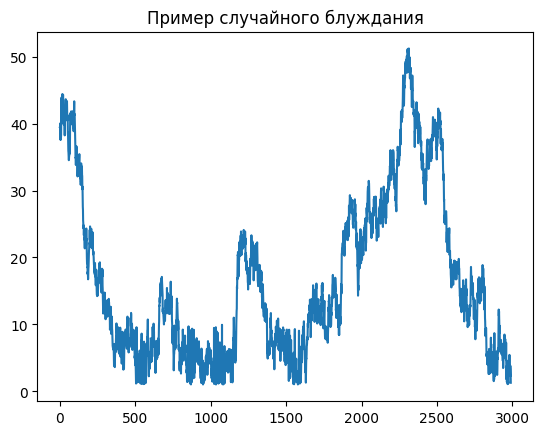

In [135]:
from tslearn.generators import random_walk_blobs
import matplotlib.pyplot as plt
import math

volumes, labels = random_walk_blobs(n_ts_per_blob=5, sz=2991, d=1, noise_level=0.5, random_state=50)

volum = abs(volumes[0])
for i, v in enumerate(volum):
    c = math.floor(math.log10(v))
    if c<0:
        volum[i] = v*(10**(abs(c)))

plt.plot(volum[::-1])
plt.title("Пример случайного блуждания")
plt.show()

In [136]:
final_df["Volum"] = volum[::-1]

In [138]:
final_df.to_csv("data/price/dataset.csv")

In [ ]:
final_df['Nickel'].interpolate(method='linear', inplace=True)
final_df['Oil'].fillna(final_df['Oil'].rolling(3, min_periods=1).mean(), inplace=True)
final_df['USD_RUB'].fillna(method='ffill', inplace=True)
final_df['Infl'].fillna(final_df['Infl'].mean(), inplace=True)


In [157]:
final_df["Nickel"].isna().value_counts()

Nickel
False    2991
Name: count, dtype: int64

In [159]:
final_df

,Date,Nickel,Oil,USD_RUB,Infl,Volum
0,2024-11-14,15677.0,72.61,100.2505,8.540000,39.477154
1,2024-11-13,15765.0,72.28,98.4955,8.540000,39.515422
2,2024-11-12,15989.0,71.89,98.2455,8.540000,37.627772
3,2024-11-11,16083.0,71.83,95.9955,8.540000,39.975500
4,2024-11-08,16327.0,73.87,97.5955,8.540000,40.078534
...,...,...,...,...,...,...
2986,2013-01-18,17560.0,111.89,30.2670,7.183833,2.305482
2987,2013-01-17,17586.0,111.10,30.1730,7.183833,3.803377
2988,2013-01-16,17405.0,110.61,30.3410,7.183833,2.264950
2989,2013-01-15,17510.0,110.30,30.2980,7.183833,2.383624


In [177]:
import pandas as pd

lags = range(1, 6)  # 1-day, 2-day, and 3-day lags
for lag in lags:
    final_df[f'Nickel_Price_lag_{lag}'] = final_df['Nickel'].shift(lag)
    
for lag in lags:
    final_df[f'Oil_Price_lag_{lag}'] = final_df['Oil'].shift(lag)
    final_df[f'USD_RUB_Price_lag_{lag}'] = final_df['USD_RUB'].shift(lag)
    final_df[f'Inflation_lag_{lag}'] = final_df['Infl'].shift(lag)
    final_df[f'Volum_lag_{lag}'] = final_df['Volum'].shift(lag)

final_df.dropna(inplace=True)

In [178]:
# Define the target (Nickel_Price) and features
X = final_df[['Nickel_Price_lag_1', 'Nickel_Price_lag_2', 'Nickel_Price_lag_3', 
          'Oil_Price_lag_1', 'Oil_Price_lag_2', 'Oil_Price_lag_3',
          'USD_RUB_Price_lag_1', 'USD_RUB_Price_lag_2', 'USD_RUB_Price_lag_3',
          'Inflation_lag_1', 'Inflation_lag_2', 'Inflation_lag_3', 
          'Volum_lag_1', 'Volum_lag_2', 'Volum_lag_3']]  # Add all lagged variables

y = final_df['Nickel']  # The target variable (current Nickel Price)


In [181]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [193]:
# Example: 80% for training, 20% for testing
train_size = int(0.8 * len(final_df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [199]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Train the model
model = RandomForestRegressor(n_estimators=200,random_state=42, max_depth=15)
model.fit(X_train, y_train)





RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42)

In [200]:
# Make predictions
y_pred = model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

target_mean = sum(y_test) / len(y_test)

# Преобразуем MSE в проценты
mse_percentage = (mse / target_mean**2) * 100
print(f'MSE in percentage: {mse_percentage:.2f}%')

MSE in percentage: 0.04%


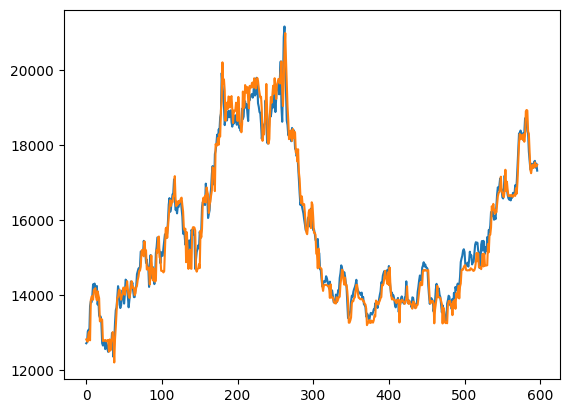

In [201]:
plt.plot(y_test.to_list())
plt.plot(y_pred)

In [197]:
import numpy as np

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better readability
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                Feature  Importance
0    Nickel_Price_lag_1    0.964567
1    Nickel_Price_lag_2    0.006929
12          Volum_lag_1    0.006152
5       Oil_Price_lag_3    0.006061
14          Volum_lag_3    0.004853
13          Volum_lag_2    0.004583
8   USD_RUB_Price_lag_3    0.001434
2    Nickel_Price_lag_3    0.001188
7   USD_RUB_Price_lag_2    0.001109
4       Oil_Price_lag_2    0.001018
6   USD_RUB_Price_lag_1    0.000944
3       Oil_Price_lag_1    0.000861
9       Inflation_lag_1    0.000116
11      Inflation_lag_3    0.000103
10      Inflation_lag_2    0.000083


In [202]:
import shap
# Создаем объяснитель для модели
explainer = shap.TreeExplainer(model)

# Получаем Shapley values для тренировочных данных
shap_values = explainer.shap_values(X_train)

/home/wormsin/miniconda3/envs/bp-calculator/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


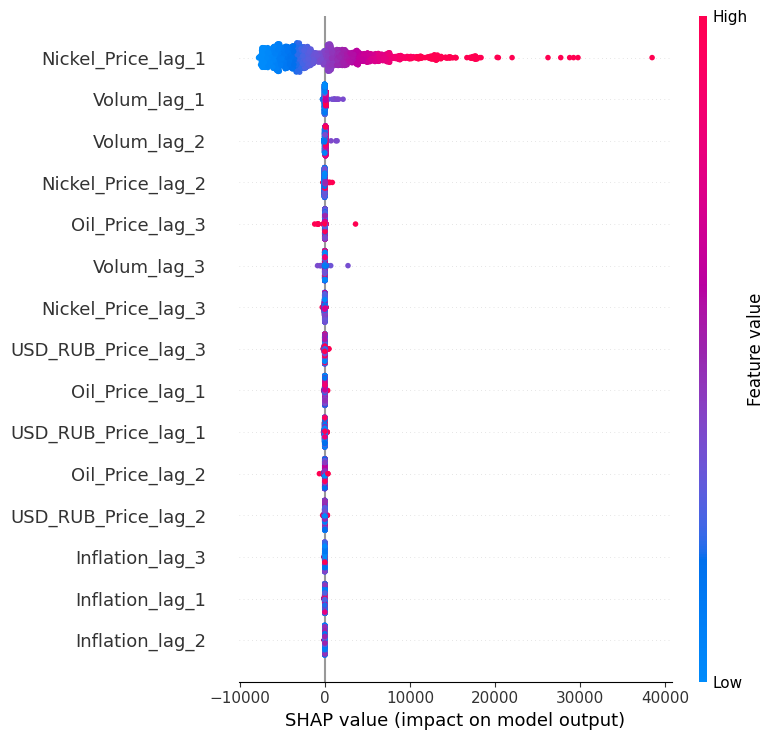

In [203]:
shap.summary_plot(shap_values, X_train)

In [208]:
# Получаем среднюю важность для каждого признака
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(shap_values).mean(axis=0)
})

# Сортируем по важности
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                Feature   Importance
0    Nickel_Price_lag_1  4404.836148
12          Volum_lag_1    59.081146
13          Volum_lag_2    40.394808
1    Nickel_Price_lag_2    28.805894
5       Oil_Price_lag_3    25.541745
14          Volum_lag_3    15.343647
2    Nickel_Price_lag_3    12.546650
8   USD_RUB_Price_lag_3     9.632933
3       Oil_Price_lag_1     9.484384
6   USD_RUB_Price_lag_1     9.281908
4       Oil_Price_lag_2     8.392453
7   USD_RUB_Price_lag_2     7.891592
11      Inflation_lag_3     3.723833
9       Inflation_lag_1     3.652767
10      Inflation_lag_2     2.825133


In [210]:
import joblib
joblib.dump(model, 'random_forest_model_price.joblib')

['random_forest_model_price.joblib']

## VAR

In [307]:
import pandas as pd
silver = pd.read_csv('data/VAR/Silver Futures Historical Data.csv')

In [308]:
silver.columns = ["Date", "Price", "Open", "High", "Low", "Vol", "Change"]

In [309]:
silver.drop(["Date", "Open", "High", "Low", "Change", "Vol"], axis=1, inplace=True)


In [310]:
silver["Price"] = silver["Price"].astype("float64")

In [311]:
silver

,Price
0,5.298
1,5.285
2,5.308
3,5.240
4,5.250
...,...
4995,18.455
4996,18.440
4997,18.610
4998,18.455


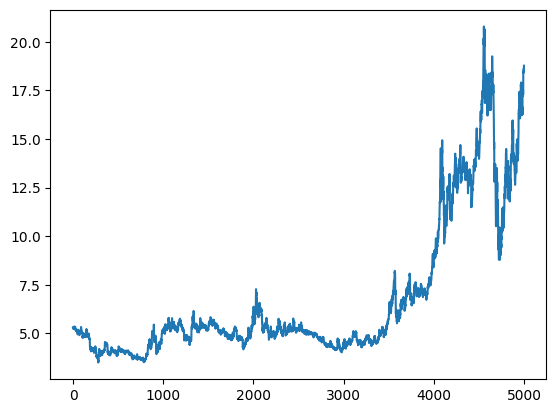

In [312]:
plt.plot(silver["Price"])

In [313]:
from tslearn.generators import random_walk_blobs
import matplotlib.pyplot as plt
import math

def vol_gen(state):
    volumes, labels = random_walk_blobs(n_ts_per_blob=5, sz=5000, d=1, noise_level=0.5, random_state=state)

    volum = abs(volumes[0])
    for i, v in enumerate(volum):
        c = math.floor(math.log10(v))
        if c<0:
            volum[i] = v*(10**(abs(c)))

    plt.plot(volum)
    plt.title("Пример случайного блуждания")
    plt.show()
    return volum[::-1]

In [314]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess

def price_gen(state):
    np.random.seed(state)
    # Параметры ARIMA процесса
    ar = np.array([1, -1])  # параметры авторегрессии
    ma = np.array([1])        # параметры скользящего среднего
    arma_process = ArmaProcess(ar, ma)

    # Генерация временного ряда длиной 1000
    synthetic_series = arma_process.generate_sample(nsample=5000)

    plt.plot(synthetic_series)
    plt.show()
    return synthetic_series

In [315]:
silver.columns = ["Silver"]

/tmp/ipykernel_6315/859463989.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c = math.floor(math.log10(v))


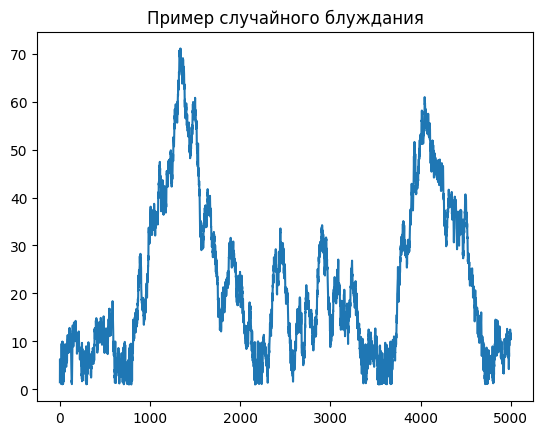

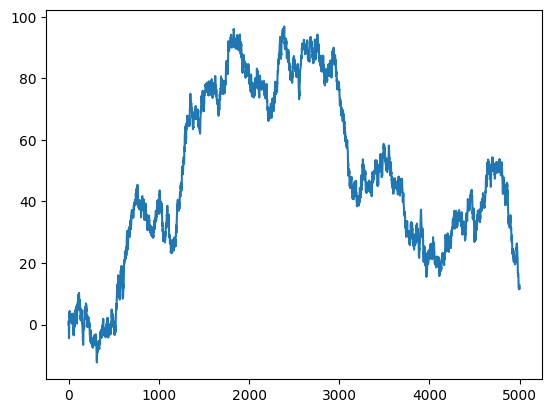

/tmp/ipykernel_6315/859463989.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c = math.floor(math.log10(v))


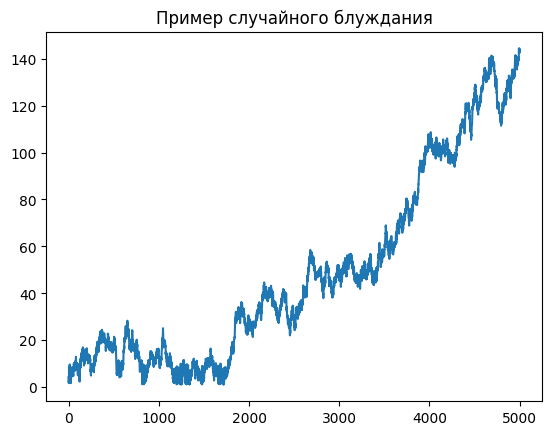

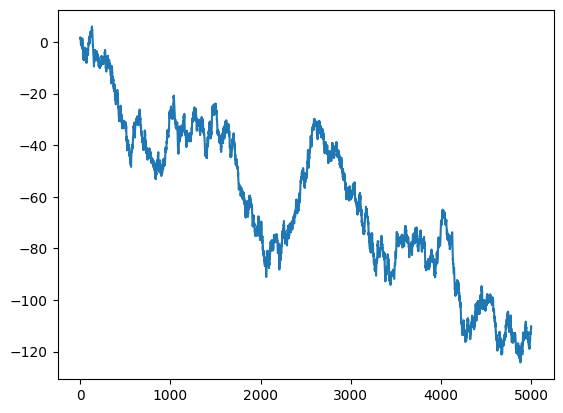

/tmp/ipykernel_6315/859463989.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c = math.floor(math.log10(v))


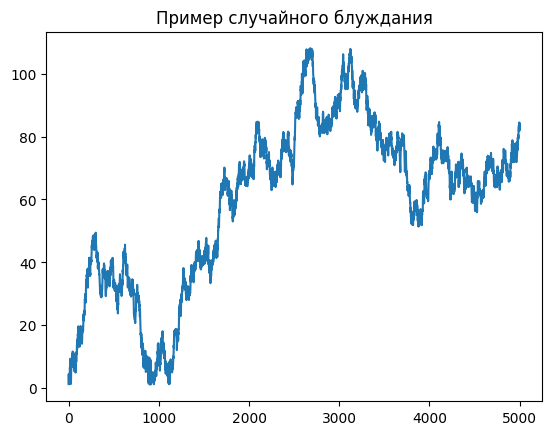

In [316]:
silver['silver_vol'] = vol_gen(5)
silver['Gold'] = price_gen(8)
silver['gold_vol'] = vol_gen(10)
silver['Plat'] = price_gen(7)
silver['plat_vol'] = vol_gen(12)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# Создаем объект MinMaxScaler с заданным диапазоном
scaler = MinMaxScaler(feature_range=(1, 30))

In [347]:
# Масштабируем данные
silver["Gold"] = scaler.transform(np.array([silver['Gold']]).T).T[0]
silver["Plat"] = scaler.transform(np.array([silver['Gold']]).T).T[0]


In [355]:
silver

,Silver,silver_vol,Gold,gold_vol,Plat,plat_vol
0,5.298,10.683104,4.246712,142.830462,5.362543,84.050566
1,5.285,11.141185,4.539742,144.437953,5.441227,81.849194
2,5.308,10.430456,4.016944,143.944791,5.300846,81.989845
3,5.240,10.652142,3.644684,143.220396,5.200887,84.481680
4,5.250,11.228258,3.028033,142.482377,5.035305,83.003021
...,...,...,...,...,...,...
4995,18.455,1.853834,7.352076,8.610432,6.196391,1.561241
4996,18.440,2.289354,7.295384,2.872202,6.181168,1.407305
4997,18.610,3.012604,7.296008,4.552023,6.181335,2.001847
4998,18.455,6.276570,7.333378,1.658934,6.191370,4.341199


In [356]:
silver.to_csv("data/VAR/dataset.csv")

In [423]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [ ]:
silver = pd.read_csv("data/VAR/dataset.csv")

In [425]:
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        return series.diff().dropna()
    return series

ADF Statistic: 0.09019915084729396
p-value: 0.9653855390222925
ADF Statistic: -1.9085195429801587
p-value: 0.32806392420402664
ADF Statistic: -1.5314726149525966
p-value: 0.5178888415104514
ADF Statistic: -2.0067989456172013
p-value: 0.2835999784655272
ADF Statistic: -1.531472614952597
p-value: 0.5178888415104513
ADF Statistic: -0.5314472716566221
p-value: 0.8857323135878885


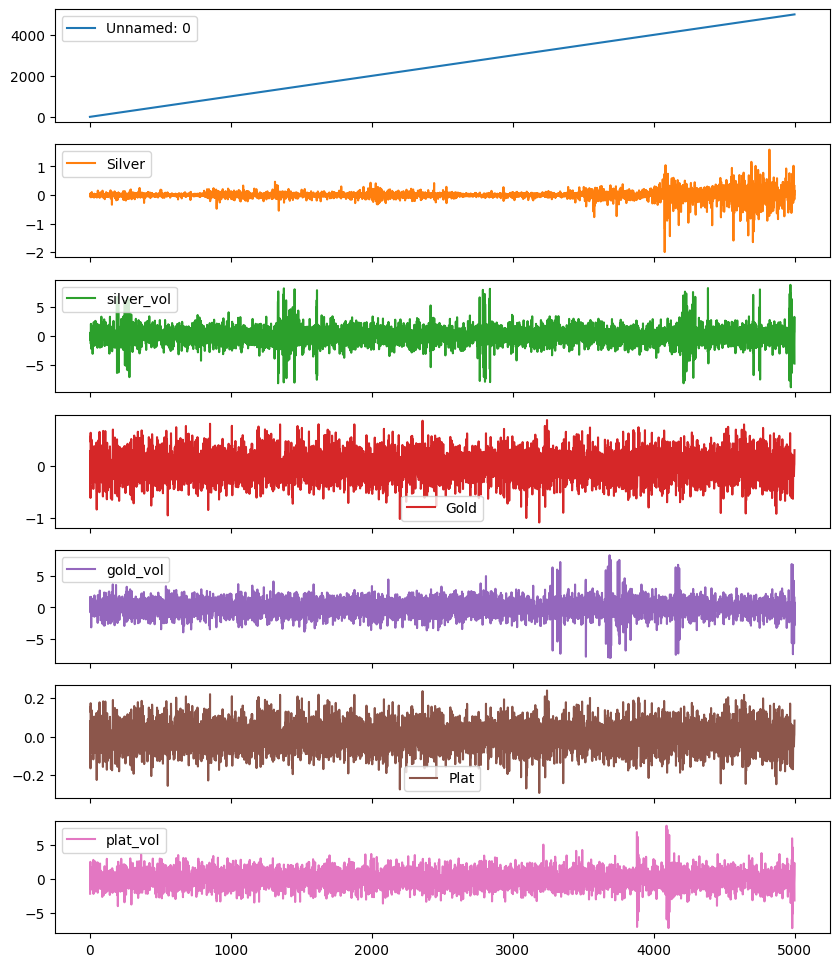

In [426]:
# Применяем проверку на стационарность для каждого столбца
silver['Silver'] = check_stationarity(silver['Silver'])
silver['silver_vol'] = check_stationarity(silver['silver_vol'])
silver['Gold'] = check_stationarity(silver['Gold'])
silver['gold_vol'] = check_stationarity(silver['gold_vol'])
silver['Plat'] = check_stationarity(silver['Plat'])
silver['plat_vol'] = check_stationarity(silver['plat_vol'])

silver.dropna()
# Визуализация временных рядов (по желанию)
silver.plot(subplots=True, figsize=(10, 12))
plt.show()

In [427]:
train_size = int(len(silver) * 0.8)  # 80% данных для тренировки
train_data = silver[:train_size]
test_data = silver[train_size:]

In [428]:
train_data = train_data.dropna()

In [439]:
test_data = test_data.dropna()

In [429]:
train_data = train_data.drop(["Unnamed: 0"], axis=1)

In [430]:
test_data = test_data.drop(["Unnamed: 0"], axis=1)

In [431]:
model = VAR(train_data)
model_fitted = model.fit(10)

/home/wormsin/miniconda3/envs/bp-calculator/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [475]:
# Прогнозирование будущих значений
forecast_steps = 5  # Прогнозируем на 12 шагов вперед (например, на следующий год)
forecast = model_fitted.forecast(train_data.values[-10:], steps=forecast_steps)

In [476]:
# Преобразуем прогноз в DataFrame для удобства
forecast_df = pd.DataFrame(forecast, columns=train_data.columns)

In [486]:
forecast_df

,Silver,silver_vol,Gold,gold_vol,Plat,plat_vol
0,5.054284e-03,-9.320709e-02,1.338992e-02,-4.007479e-01,3.598645e-03,-6.803767e-01
1,-1.219647e+05,6.136929e+06,-2.851538e+04,6.956344e+06,-7.656909e+03,-2.014120e+06
2,1.497368e+04,-3.535159e+06,1.665002e+04,-3.358060e+06,4.465204e+03,8.983921e+05
3,2.145114e+11,-1.079363e+13,5.015282e+10,-1.223481e+13,1.346696e+10,3.542432e+12
4,-1.165099e+11,1.075495e+13,-5.036685e+10,1.104930e+13,-1.351453e+10,-3.069223e+12


In [478]:
silver = pd.read_csv("data/VAR/dataset.csv")

In [479]:
silver = silver.drop(["Unnamed: 0"], axis=1)

In [492]:
silver[train_size-5:train_size].reset_index(drop=True).astype("float64")

,Silver,silver_vol,Gold,gold_vol,Plat,plat_vol
0,8.645,34.371610,10.720501,11.205532,7.100875,7.507992
1,8.395,34.548322,10.510218,12.748054,7.044410,7.279252
2,8.435,35.301403,10.189843,13.045011,6.958384,9.065029
3,8.578,34.576136,10.236766,12.437310,6.970983,7.665701
4,8.660,33.768710,10.130105,13.318227,6.942343,10.560929


In [495]:
df_sum = forecast_df.astype("float64") + silver[train_size-5:train_size].reset_index(drop=True).astype("float64")

In [497]:
df_sum

,Silver,silver_vol,Gold,gold_vol,Plat,plat_vol
0,8.650054e+00,3.427840e+01,1.073389e+01,1.080478e+01,7.104474e+00,6.827616e+00
1,-1.219563e+05,6.136964e+06,-2.850487e+04,6.956357e+06,-7.649864e+03,-2.014112e+06
2,1.498211e+04,-3.535124e+06,1.666021e+04,-3.358047e+06,4.472162e+03,8.984012e+05
3,2.145114e+11,-1.079363e+13,5.015282e+10,-1.223481e+13,1.346696e+10,3.542432e+12
4,-1.165099e+11,1.075495e+13,-5.036685e+10,1.104930e+13,-1.351453e+10,-3.069223e+12


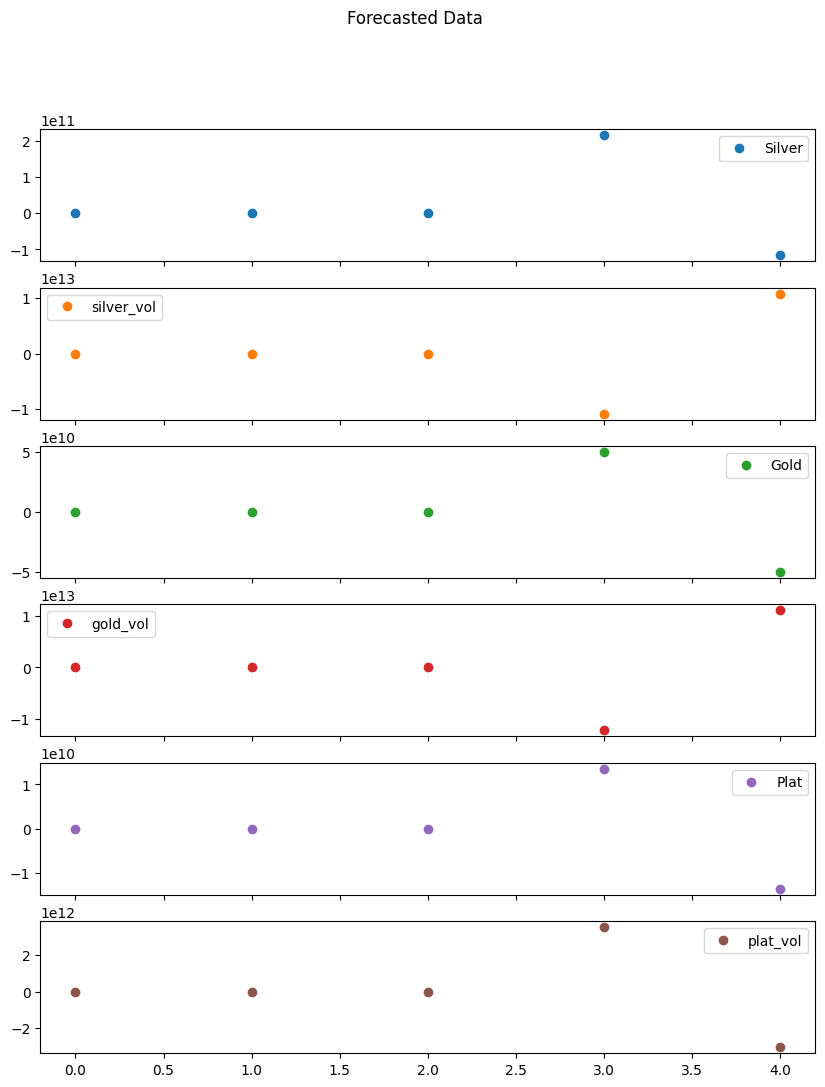

In [498]:
# Визуализируем прогноз
df_sum.plot(subplots=True, figsize=(10, 12), marker = 'o', linestyle= '')
plt.suptitle('Forecasted Data')
plt.show()